# Sesiunea 18 din modulul 18-19_Matplotlib – Primele vizualizări ghidate
_Notebook de exerciții (fără soluții) din seria 18-19_Matplotlib, bazată pe datele pregătite în modulul 16-17_Pandas pentru a obține grafice curate și expresive._


### Exercițiul 1 – Linia evoluției vânzărilor pe ani
Agregă setul de vânzări din sesiunea 17 la nivel anual (sau construiește o serie echivalentă cu cel puțin șase ani) și trasează evoluția cu `plt.plot`, folosind markeri vizibili pentru fiecare punct. Adaugă titlu, etichete de axă, legendă și grilă, apoi evidențiază maximul prin `annotate`; opțional, suprapune o linie de trend calculată cu `numpy.polyfit`.


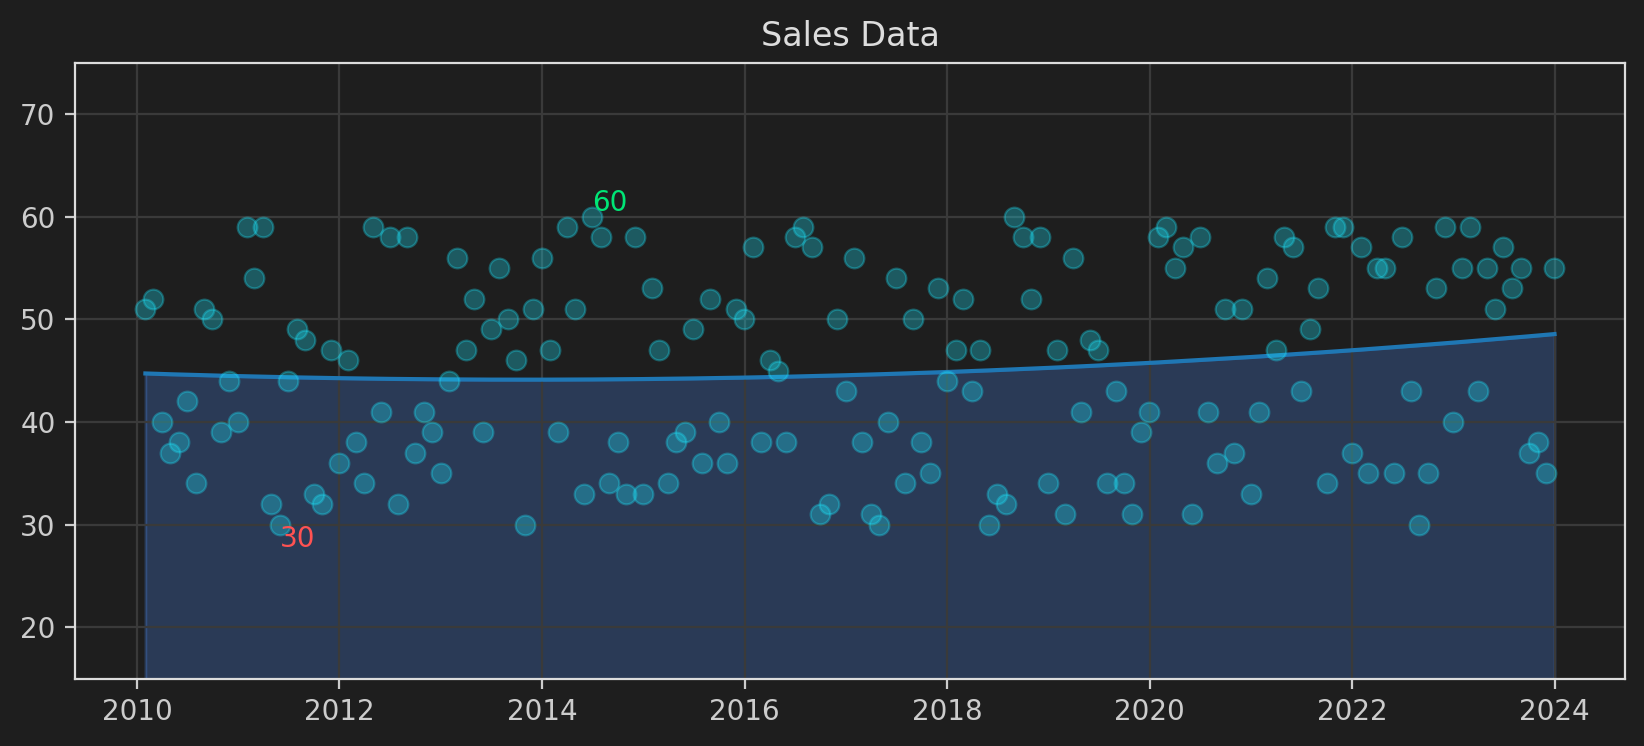

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

random.seed(42)

# --- plot colors ---
plt.rcParams.update({
    "axes.facecolor": "#1e1e1e",
    "figure.facecolor": "#1e1e1e",
    "axes.edgecolor": "#DDDDDD",
    "axes.labelcolor": "#DDDDDD",
    "xtick.color": "#CCCCCC",
    "ytick.color": "#CCCCCC",
    "text.color": "#DDDDDD",
    "grid.color": "#3a3a3a",
    "legend.edgecolor": "#1e1e1e",
    "legend.facecolor": "#2d2d30"
})

# --- data ---
cities = [
    "New York", "Philadelphia", "Boston", "Washington D.C.",
    "Baltimore", "Pittsburgh", "Cleveland", "Buffalo",
    "Hartford", "Providence"]

products = [
    "Laptop", "Desktop PC", "Smartphone", "Tablet",
    "Smartwatch", "Headphones", "Bluetooth Speaker",
    "Keyboard", "Mouse", "Monitor", "Webcam", "Printer"]

dates = pd.date_range(start="2010-01-01", freq="ME", end="2024-01-01")

min_value = 30
max_value = 60

data = {
    "City": [random.choice(cities) for _ in range(len(dates))],
    "Product": [random.choice(products) for _ in range(len(dates))],
    "Sales": [random.randint(min_value, max_value) for _ in range(len(dates))]
}

df = pd.DataFrame(data, index=dates)

# --- polyfit ---
x = np.arange(len(df))
y = df["Sales"].values

coef = np.polyfit(x, y, 2)
poly = np.poly1d(coef)
y_fit = poly(x)

plt.figure(figsize=(10, 4), dpi=200)

pad = (max_value - min_value) * 0.5
plt.ylim(min_value - pad, max_value + pad)

plt.plot(df.index, y_fit)
plt.fill_between(df.index, y_fit, 0, color="#4E91FF", alpha=0.25)

# --- points ---
plt.scatter(df.index, df["Sales"], s=50, color="#1CE8FF", alpha=0.3, linewidth=0.8, zorder=3)
plt.title("Sales Data")

# --- highest point ---
hi_idx = df["Sales"].idxmax()
hi_val = df["Sales"].max()
plt.text(hi_idx, hi_val, f"{hi_val}", va="bottom", color="#00E676")

# --- lowest point ---
lo_idx = df["Sales"].idxmin()
lo_val = df["Sales"].min()
plt.text(lo_idx, lo_val, f"{lo_val}", va="top", color="#FF5252")

plt.grid(True, zorder=0)
plt.savefig("sales.png", dpi=300, bbox_inches="tight")
plt.show()

### Exercițiul 2 – Temperaturile zilnice într-o singură privire
Generează sau încarcă temperaturi pentru 7–30 de zile și reprezintă-le cu o linie sau cu bare, în funcție de povestea setului. Marchează media, minimul și maximul prin linii sau markeri suplimentari, formatează axa X cu date lizibile și, dacă graficul este o linie, adaugă un `fill_between` discret până la zero pentru accent.

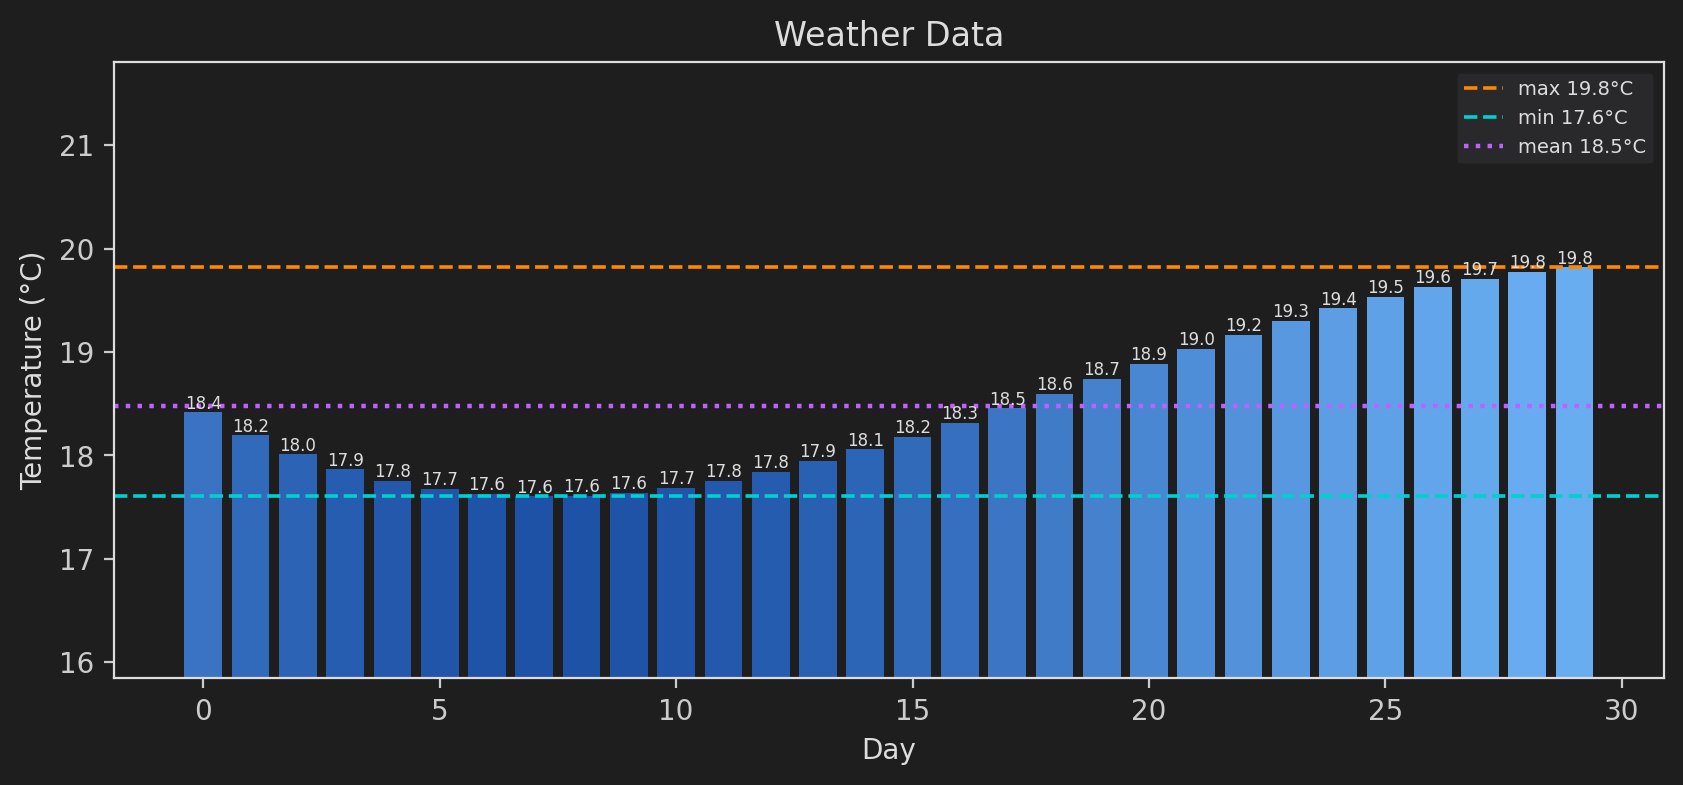

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random

random.seed(42)

# --- plot colors ---
plt.rcParams.update({
    "axes.facecolor": "#1e1e1e",
    "figure.facecolor": "#1e1e1e",
    "axes.edgecolor": "#DDDDDD",
    "axes.labelcolor": "#DDDDDD",
    "xtick.color": "#CCCCCC",
    "ytick.color": "#CCCCCC",
    "text.color": "#DDDDDD",
    "grid.color": "#3a3a3a",
    "legend.edgecolor": "#1e1e1e",
    "legend.facecolor": "#2d2d30"
})

# --- wheater data ---
data = [(i, random.uniform(10, 30)) for i in range(30)]

x, h = zip(*data)

plt.figure(figsize=(10, 4), dpi=200)

plt.title("Weather Data")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")

# --- polyfit smooth ---
x_arr = np.array(x)
h_arr = np.array(h)

coef = np.polyfit(x_arr, h_arr, 3)
poly = np.poly1d(coef)

# smoothed values for each bar position
h_smooth = poly(x_arr)

N = len(h_smooth)

# pick two colors to blend between
c1 = np.array(mcolors.to_rgb("#1E52A7"))
c2 = np.array(mcolors.to_rgb("#69ADF1"))

h_min = min(h_smooth)
h_max = max(h_smooth)

norm = (h_smooth - h_min) / (h_max - h_min)

colors = [c1 + (c2 - c1) * t for t in norm]

# bars
bars = plt.bar(x_arr, h_smooth, color=colors, edgecolor=None)

# temps labels
for bar, value in zip(bars, h_smooth):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        value,
        f"{value:.1f}",
        ha="center",
        va="bottom",
        size=6
    )

x_smooth = np.linspace(0, len(h_arr) - 1, 400)
y_smooth = poly(x_smooth)

max_temp = max(h_smooth)
min_temp = min(h_smooth)
mean_temp = np.mean(h_smooth)

plt.ylim(min_temp - (min_temp * 0.1), max_temp + (max_temp * 0.1))

plt.axhline(max_temp,  color="#FF8800", linestyle="--", linewidth=1.3, label=f"max {max_temp:.1f}°C")
plt.axhline(min_temp,  color="#00D0D0", linestyle="--", linewidth=1.3, label=f"min {min_temp:.1f}°C")
plt.axhline(mean_temp, color="#C060FF", linestyle=":",  linewidth=1.6, label=f"mean {mean_temp:.1f}°C")

plt.legend(fontsize=7)
plt.savefig("weather.png", dpi=300, bbox_inches="tight")
plt.show()

### Exercițiul 3 – Bare verticale pentru comparația pe categorii
Construiește 5–10 categorii de produse cu valori de vânzări și desenează un grafic cu bare verticale ordonate descrescător. Atribuie o paletă de culori, adaugă etichete numerice deasupra fiecărei bare, rotește etichetele de pe axa X dacă este necesar și, pentru context, trasează o linie a mediei peste bare.


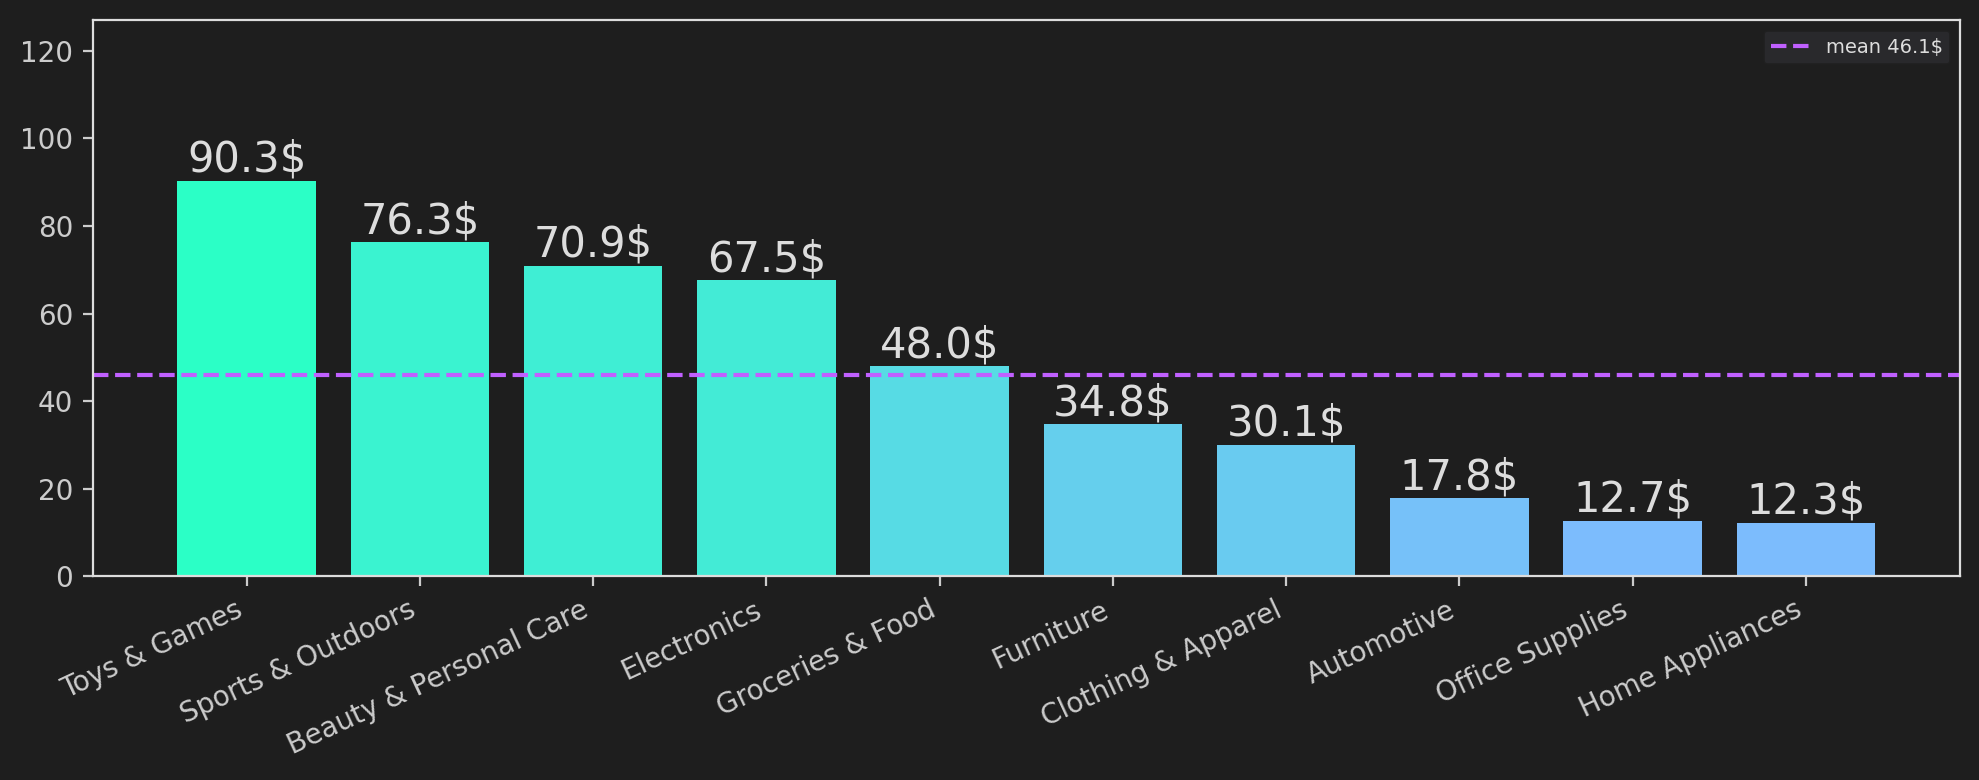

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random

random.seed(42)

# --- plot colors ---
plt.rcParams.update({
    "axes.facecolor": "#1e1e1e",
    "figure.facecolor": "#1e1e1e",
    "axes.edgecolor": "#DDDDDD",
    "axes.labelcolor": "#DDDDDD",
    "xtick.color": "#CCCCCC",
    "ytick.color": "#CCCCCC",
    "text.color": "#DDDDDD",
    "grid.color": "#3a3a3a",
    "legend.edgecolor": "#1e1e1e",
    "legend.facecolor": "#2d2d30"
})

product_categories = [
    "Electronics",
    "Home Appliances",
    "Furniture",
    "Clothing & Apparel",
    "Sports & Outdoors",
    "Beauty & Personal Care",
    "Toys & Games",
    "Automotive",
    "Groceries & Food",
    "Office Supplies"
]

# GRADIENT
def gradient_flow(values: iter, c1_hex = "#1E52A7", c2_hex = "#69ADF1"):
    c1 = np.array(mcolors.to_rgb(c1_hex))
    c2 = np.array(mcolors.to_rgb(c2_hex))

    h_min = min(values)
    h_max = max(values)

    norm = (values - h_min) / (h_max - h_min)

    colors = [c1 + (c2 - c1) * t for t in norm]
    return colors

# figure size and dpi
plt.figure(figsize=(10, 4), dpi=200)

# data
products = [(product, random.uniform(10, 100)) for product in product_categories]
products.sort(key=lambda x: -x[1])

labels, values = zip(*products)

min_value = 10
max_value = 100
mean_value = np.mean(values)

colors = gradient_flow(np.array(values), "#7CBCFDAA", "#2BFFC6B8")
bars = plt.bar(range(len(values)), values, color=colors)

# LABELS
for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        value,
        f"{value:.1f}$",
        ha="center",
        va="bottom",
        size=15
    )

# MARGINS
padding = (max_value - min_value) * 0.3
plt.ylim(max(0, min_value - padding), max_value + padding)

# PLOT
plt.xticks(range(len(values)), labels, rotation=25, ha="right")
plt.axhline(mean_value, linestyle="--", label=f"mean {mean_value:.1f}$", color="#C060FF")
plt.tight_layout()
plt.legend(fontsize=7)
plt.savefig("prices.png", dpi=300, bbox_inches="tight")
plt.show()

### Exercițiul 4 – Scatter pentru relații și stiluri
Generează două serii `x` și `y` cu 100–300 de puncte și un al treilea indicator pentru mărimea markerului. Plotează un scatter cu mărimi variabile (`s`), mapează culorile la a treia variabilă și adaugă o bară de culori, setând `alpha` pentru a evita suprapunerea; opțional, desenează o linie de regresie sau un contur pentru a evidenția tendința.

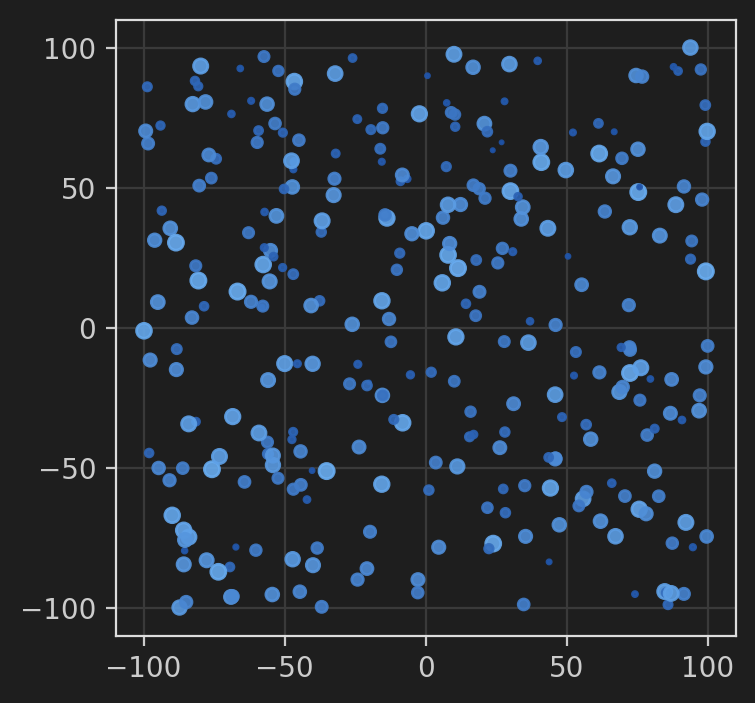

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random

random.seed(42)

# --- plot colors ---
plt.rcParams.update({
    "axes.facecolor": "#1e1e1e",
    "figure.facecolor": "#1e1e1e",
    "axes.edgecolor": "#DDDDDD",
    "axes.labelcolor": "#DDDDDD",
    "xtick.color": "#CCCCCC",
    "ytick.color": "#CCCCCC",
    "text.color": "#DDDDDD",
    "grid.color": "#3a3a3a",
    "legend.edgecolor": "#1e1e1e",
    "legend.facecolor": "#2d2d30"
})

# GRADIENT
def gradient_flow(values: iter, c1_hex = "#1E52A7", c2_hex = "#69ADF1"):
    c1 = np.array(mcolors.to_rgb(c1_hex))
    c2 = np.array(mcolors.to_rgb(c2_hex))

    h_min = min(values)
    h_max = max(values)

    norm = (values - h_min) / (h_max - h_min)

    colors = [c1 + (c2 - c1) * t for t in norm]
    return colors

# figure size and dpi
plt.figure(figsize=(4, 4), dpi=200)

length = 300
min_value = -100
max_value = 100

min_size = 1
max_size = 30

x = [random.uniform(min_value, max_value) for _ in range(length)]
y = [random.uniform(min_value, max_value) for _ in range(length)]
sizes = [random.uniform(min_size, max_size) for _ in range(length)]
colors = gradient_flow(np.array(sizes))

plt.xticks(np.arange(-100, 101, 50))
plt.yticks(np.arange(-100, 101, 50))

plt.scatter(x, y, zorder=2, s=sizes, color=colors, alpha=0.9)
plt.grid(True)
plt.savefig("dots.png", dpi=300, bbox_inches="tight")
plt.show()

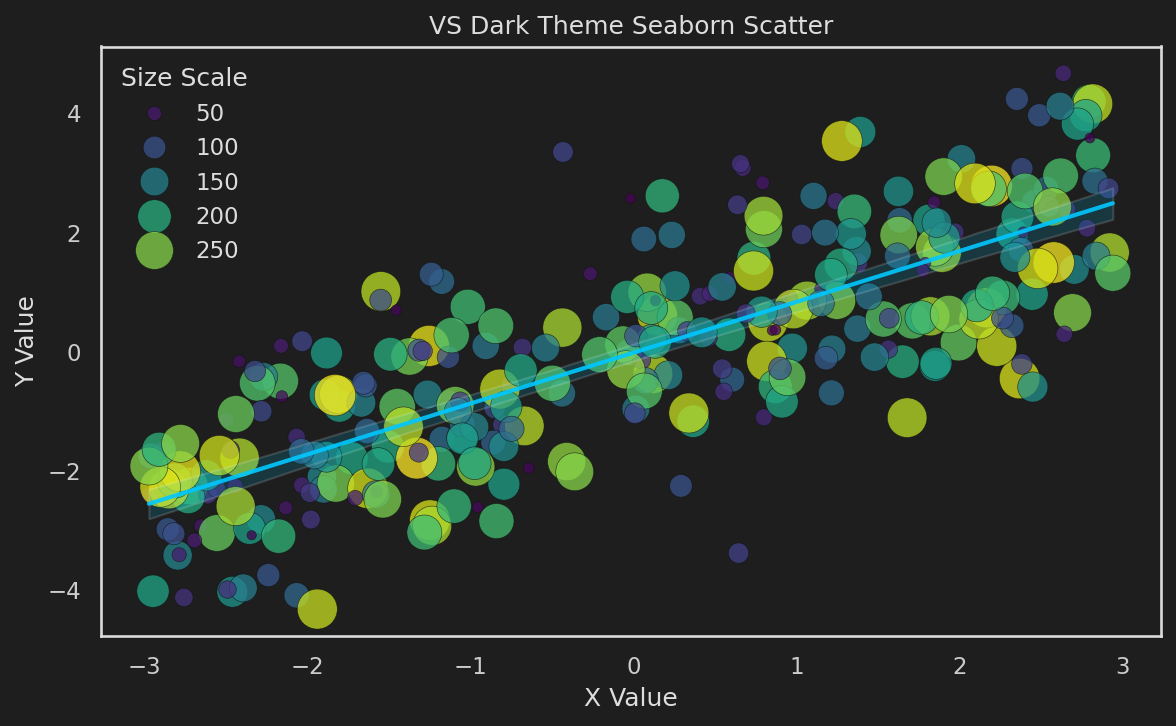

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- VS Code Dark Theme Style ---
sns.set_theme(
    style="dark",
    rc={
        "axes.facecolor": "#1e1e1e",
        "figure.facecolor": "#1e1e1e",
        "axes.edgecolor": "#DDDDDD",
        "axes.labelcolor": "#DDDDDD",
        "xtick.color": "#CCCCCC",
        "ytick.color": "#CCCCCC",
        "text.color": "#DDDDDD",
        "grid.color": "#3a3a3a",
    }
)

# sample data
np.random.seed(42)
n = 300
x = np.random.uniform(-3, 3, n)
y = 0.8*x + np.random.normal(0, 1.2, n)
sizes = np.random.uniform(30, 300, n)

plt.figure(figsize=(8, 5), dpi=150)

# scatter with size + hue mapped to sizes
sns.scatterplot(
    x=x,
    y=y,
    hue=sizes,
    size=sizes,
    palette="viridis",
    sizes=(20, 400),
    alpha=0.75,
    edgecolor="#111",
    linewidth=0.3,
)

# regression line
sns.regplot(
    x=x,
    y=y,
    scatter=False,
    color="#00C8FF",
    line_kws={"linewidth": 2, "alpha": 0.9}
)

plt.title("VS Dark Theme Seaborn Scatter")
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.legend(title="Size Scale", loc="upper left", frameon=False)

plt.tight_layout()
plt.show()

### Exercițiul 5 – Figură 2×2 pentru un dashboard rapid
Creează o figură cu patru subploturi (2×2) care să includă o linie, un grafic cu bare, o histogramă și un scatter. Oferă fiecărui subplot titlu și etichete coerente, folosește axe partajate acolo unde ajută comparația și finalizează cu `tight_layout()` sau `constrained_layout=True`; consideră o legendă comună dacă seriile sunt relaționate.


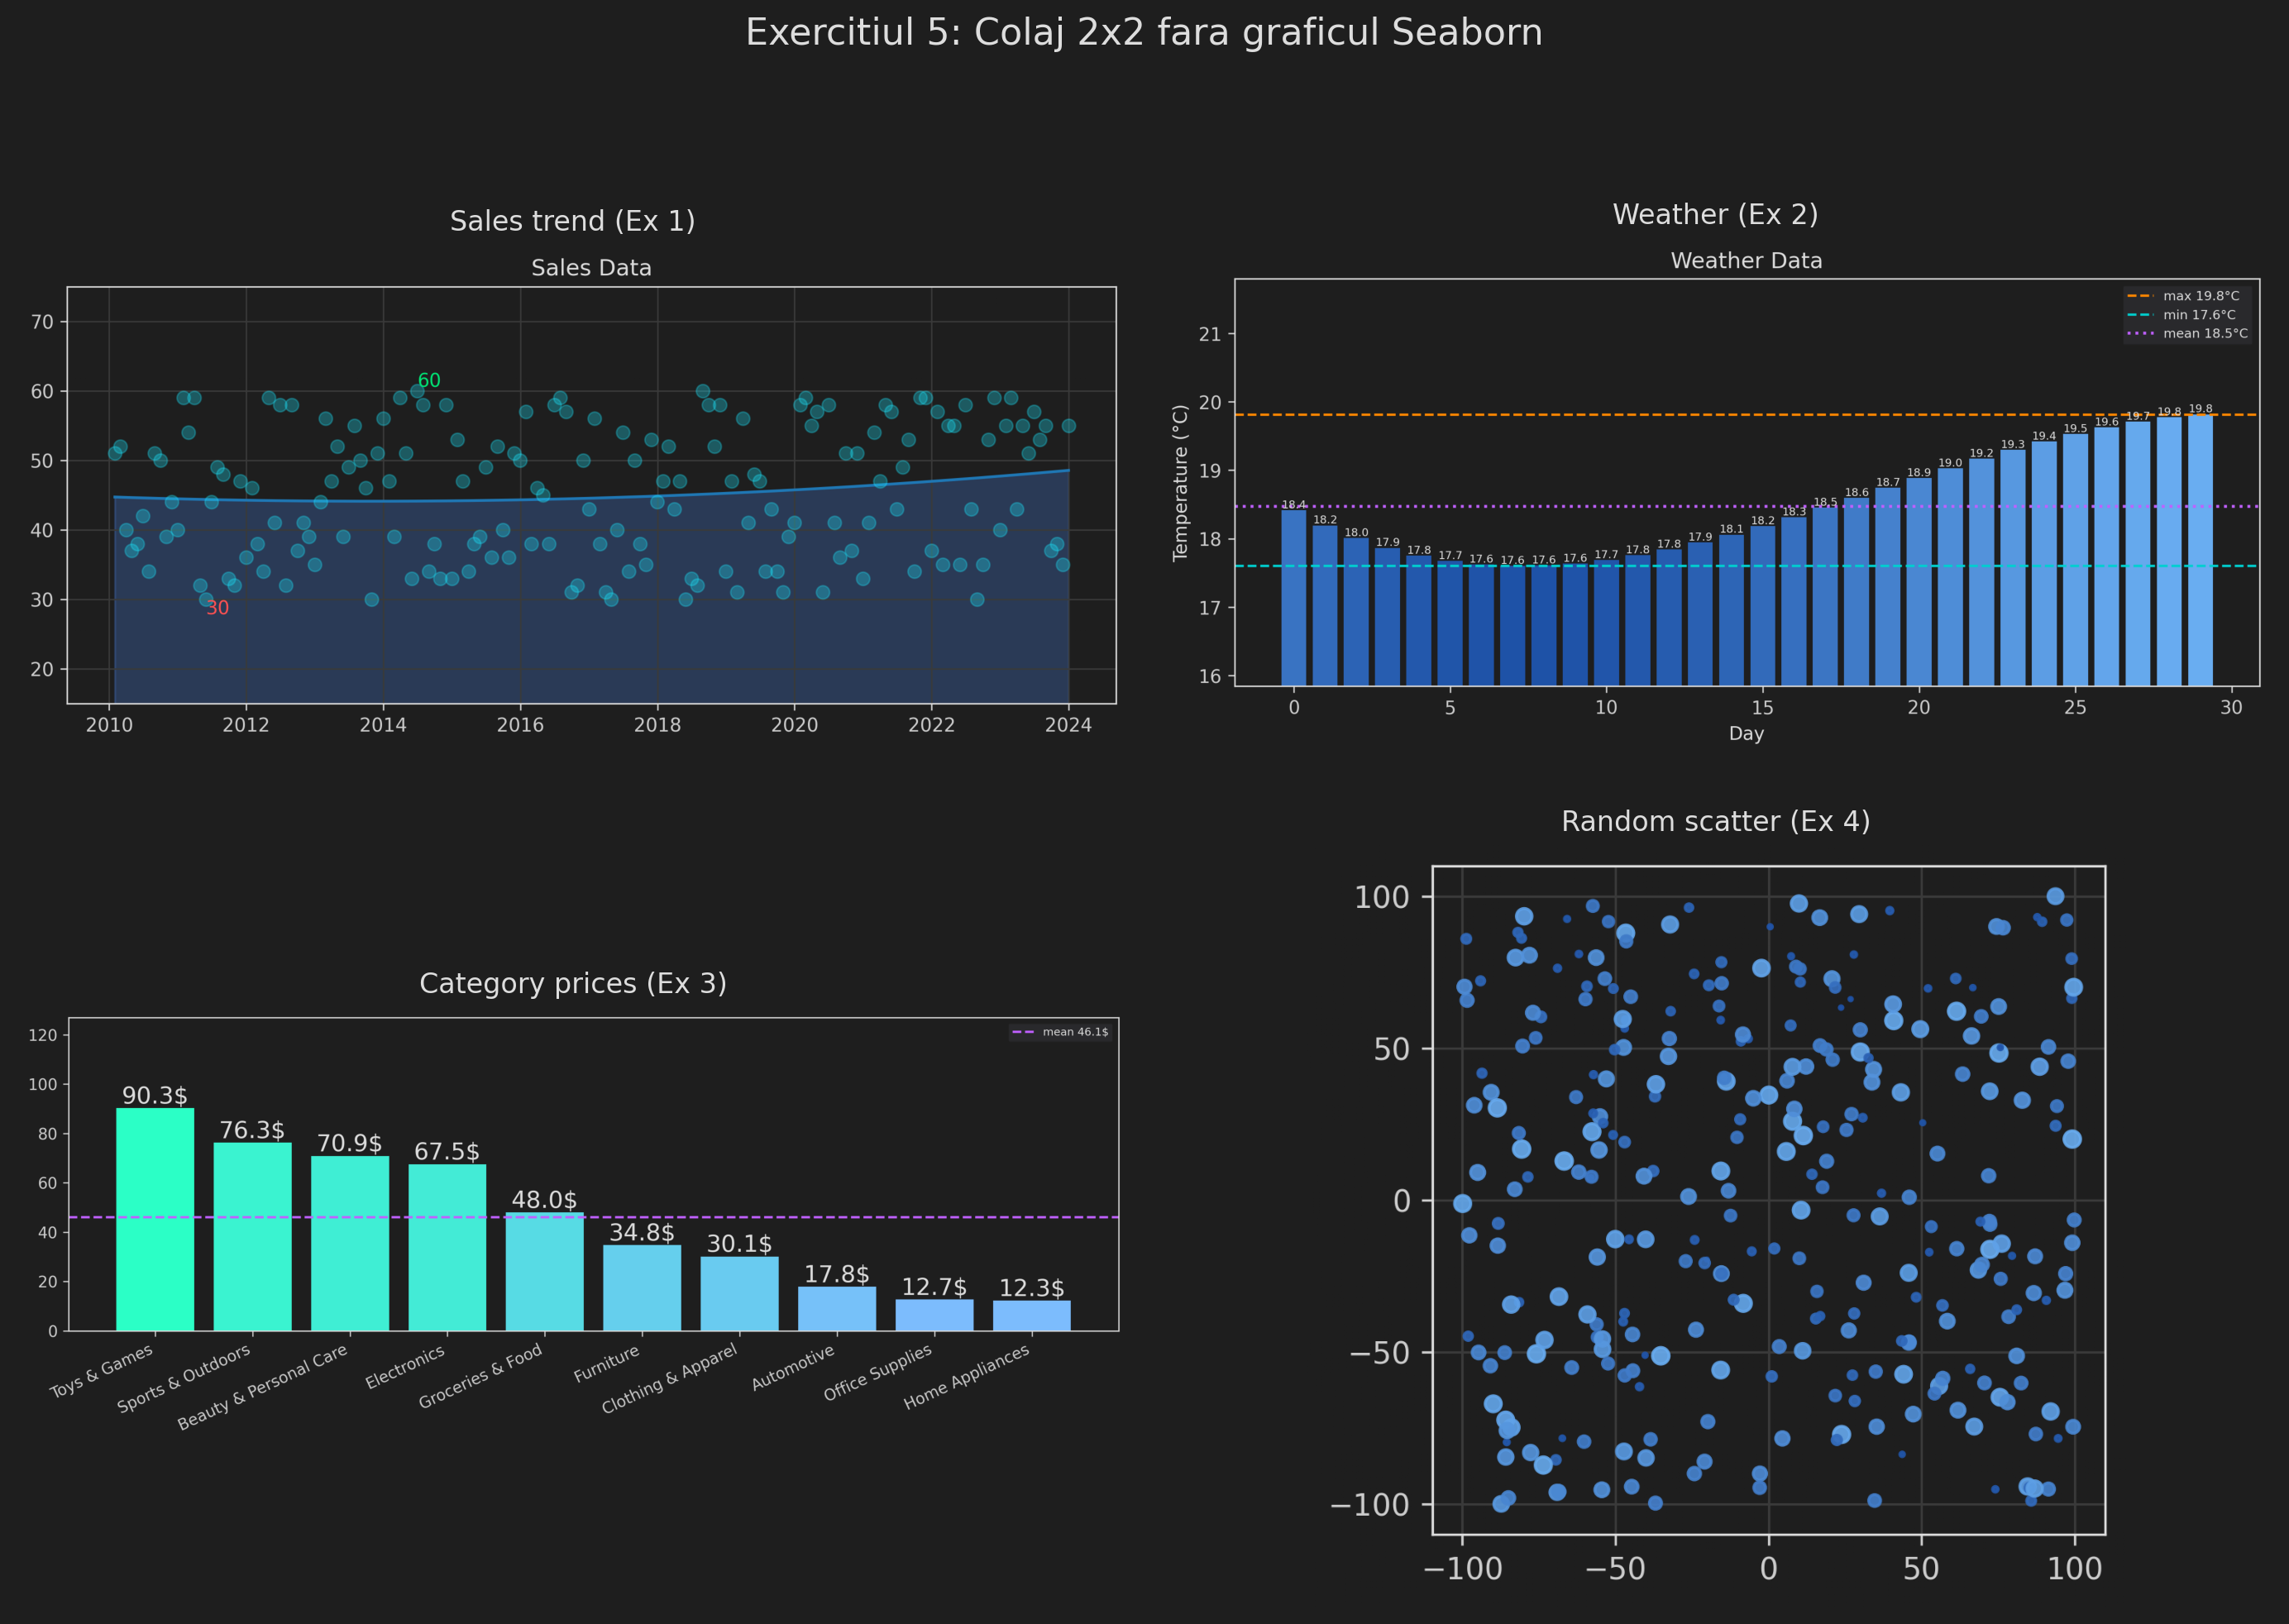

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

# reuse the four matplotlib figures (excluding the seaborn one)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), dpi=200)
fig.patch.set_facecolor('#1e1e1e')

plot_map = {
    'Sales trend (Ex 1)': 'sales.png',
    'Weather (Ex 2)': 'weather.png',
    'Category prices (Ex 3)': 'prices.png',
    'Random scatter (Ex 4)': 'dots.png',
}

for ax, (title, file_name) in zip(axes.flat, plot_map.items()):
    img_path = Path(file_name)
    if not img_path.exists():
        ax.text(0.5, 0.5, f'Missing {file_name}\nRun its exercise cell first.',
                ha='center', va='center', color='#FF8A80')
        ax.axis('off')
        continue

    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(title, color='#DDDDDD')
    ax.axis('off')

plt.suptitle('Exercitiul 5: Colaj 2x2 fara graficul Seaborn', color='#DDDDDD', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('exercise5_2x2_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()


### Exercițiul 6 – Exportul figurilor în formate multiple
Reutilizează unul dintre graficele tale (sau construiește unul succint), setează dimensiunea figurii și rezoluția (`dpi=300` pentru print) și salvează rezultatul în folderul `export/` atât ca PNG, cât și ca PDF. Controlează marginile și fundalul (transparent sau nu) și confirmă că fișierele au fost create.


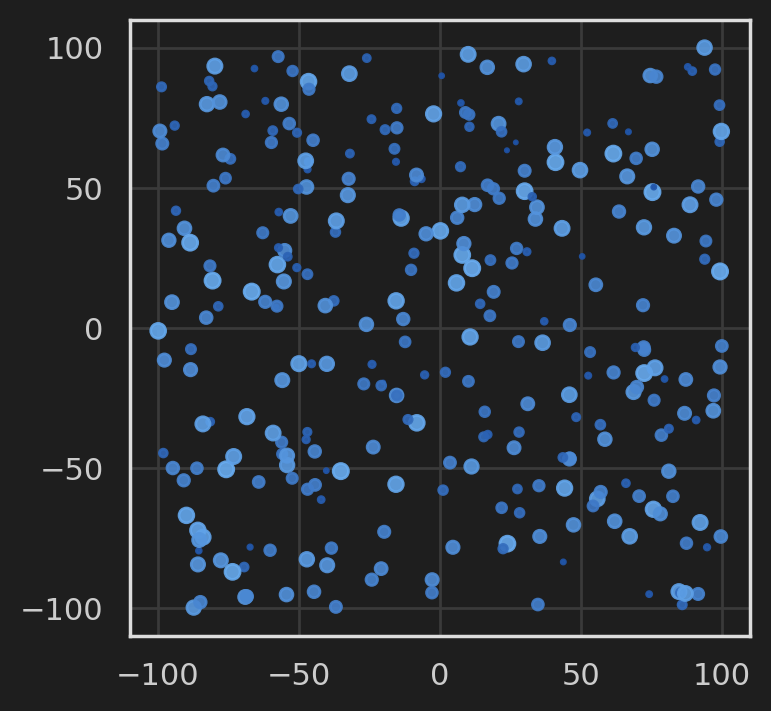

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random

random.seed(42)

# --- plot colors ---
plt.rcParams.update({
    "axes.facecolor": "#1e1e1e",
    "figure.facecolor": "#1e1e1e",
    "axes.edgecolor": "#DDDDDD",
    "axes.labelcolor": "#DDDDDD",
    "xtick.color": "#CCCCCC",
    "ytick.color": "#CCCCCC",
    "text.color": "#DDDDDD",
    "grid.color": "#3a3a3a",
    "legend.edgecolor": "#1e1e1e",
    "legend.facecolor": "#2d2d30"
})

# GRADIENT
def gradient_flow(values: iter, c1_hex = "#1E52A7", c2_hex = "#69ADF1"):
    c1 = np.array(mcolors.to_rgb(c1_hex))
    c2 = np.array(mcolors.to_rgb(c2_hex))

    h_min = min(values)
    h_max = max(values)

    norm = (values - h_min) / (h_max - h_min)

    colors = [c1 + (c2 - c1) * t for t in norm]
    return colors

# figure size and dpi
plt.figure(figsize=(4, 4), dpi=200)

length = 300
min_value = -100
max_value = 100

min_size = 1
max_size = 30

x = [random.uniform(min_value, max_value) for _ in range(length)]
y = [random.uniform(min_value, max_value) for _ in range(length)]
sizes = [random.uniform(min_size, max_size) for _ in range(length)]
colors = gradient_flow(np.array(sizes))

plt.xticks(np.arange(-100, 101, 50))
plt.yticks(np.arange(-100, 101, 50))

plt.scatter(x, y, zorder=2, s=sizes, color=colors, alpha=0.9)
plt.grid(True)
plt.savefig("dots.png", dpi=300, bbox_inches="tight")

plt.savefig('export/dots.png', dpi=300, bbox_inches='tight')
plt.savefig('export/dots.pdf', dpi=300, bbox_inches='tight')

plt.show()

### Exercițiul 7 – Mini-dashboard dintr-un fișier CSV
Încarcă un fișier CSV local (de exemplu, evoluția lunară pe categorii) și construiește o figură unificată cu patru grafice coordonate. Menține un stil consecvent pentru fonturi, culori și grosimi ale liniilor, adaugă legendă comună, titlu general și o notă privind sursa datelor, apoi exportă figura finală în `export/dashboard.png` și `export/dashboard.pdf`.
